# QDA, LDA
Quadratic discriminant analysis, Linear discriminant anlysis

대표적인 확률론적 생성 모형(generative model)이다. 

1. Likelihood, 즉, y의 클래스 값에 따른 x의 분포에 대한 정보를 알아낸 후,
1. 베이즈 정리를 사용하여 주어진 x에 대한 y의 확률 분포를 찾아낸다.

## 생성 모형
생성 모형에서는 다음처럼 베이즈 정리는 사용하여 조건부 확률 $p(y=C_k \mid x)$ 을 계산한다.

$$P(y = C_k \mid x) = \dfrac{P(x \mid y = C_k)\; P(y = C_k)}{P(x)}$$

분류 문제를 풀기 위해서는 각 클래스 k에 대한 확률을 비교하여 가장 큰 값을 선택하므로 모든 클래스에 대해 값이 같은 분모 $P(x)$은 굳이 계산하지 않아도 괜찮다.

$$P(y = C_k \mid x) \;\; \propto \;\; P(x \mid y = C_k) \; P(y = C_k)$$

여기에서 사전 확률(prior)는 특별한 정보가 없는 경우, 다음처럼 계산한다.

$$P(y = C_k) \approx \frac{y = C_k \text{인 데이터의 수 } \text{ } }{{\text{ }}\text{    모든 데이터의 수    }}$$

- 만약 다른 지식, 정보로 알고 있는 사전 확률 값이 있다면 그 값을 사용하면 된다.

y에 대한 x의 조건부 확률인 Likelihood는 일반적으로 정규 분포나 베르누이 분포와 같은 특정한 모형을 가정하여 다음과 같이 계산한다.

1. Likelihood가 특정한 확률 분포 모형을 따른다고 가정한다. 즉, 확률 밀도 함수의 형태 가정
1. k번째 클래스에 속하는 training data를 사용하여 이 모형의 모수 값을 구한다.
1. 모수 값을 알고 있으므로 likelihood의 확률 밀도 함수를 구한 것이다. 
1. 즉, 새로운 독립변수 값 x가 어떤 값이 되더라도 $P(x \mid y = C_k)$의 값을 계산할 수 있다.

## QDA
독립 변수가 x가 실수이고, 확률 분포가 **다변수 가우시안 정규 분포**라고 가정한다. 단 x분포의 위치와 형태는 클래스에 따라 달라질 수 있다.

$$p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)$$

이 분포들을 알고 있으면, 독립 변수 x에 대한 y 클래스의조건부 확률 분포를 구할 수 있다.
- by 베이즈정리, 전체 확률의 법칙

$$P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }$$

예를 들어  y 가 1, 2, 3 이라는 3개의 클래스를 가지고 각 클래스에서의  x 의 확률 분포가 다음과 같은 기대값 및 공분산 행렬을 가진다고 가정하자.

$$\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}$$

$$\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}$$

y의 사전 확률은 모두 동일하다.

In [1]:
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0], [0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

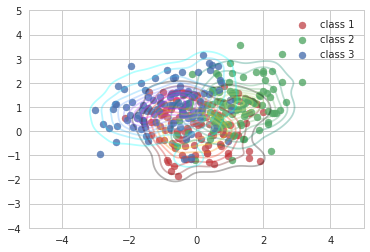

In [2]:
%matplotlib inline
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.legend()
plt.show()

Scikit-learn은 QDA를 위해 
`QuadraticDiscriminantAnalysis` 클래스를 제공한다.
- `means_`:  각 클래스  k 에서  x 의 기댓값 벡터  μk 의 추정치 벡터.
- `covariance_`: 각 클래스  k 에서  x 의 공분산 행렬  Σk 의 추정치 행렬. (생성자 인수 `store_covariance` 값이 `True`인 경우에만 제공)

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [4]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [5]:
print(qda.covariance_[0])
print(qda.covariance_[1])
print(qda.covariance_[2])

[[ 0.73846319 -0.01762041]
 [-0.01762041  0.72961278]]
[[0.66534246 0.21132313]
 [0.21132313 0.78806006]]
[[0.9351386  0.22880955]
 [0.22880955 0.79142383]]


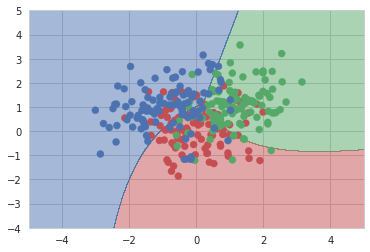

In [6]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), 
                     np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), 
                XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

## LDA
QDA + 공분산 행렬이 모두 같음

LDA에서는 각 Y클래스에 대한 독립 변수 X의 조건부 확률 분포가 **공통된 공분산 행렬을 가지는 ** 다변수 가우시안 정규 분포라고 가정한다. 

이때 조건부 확률 분포를 다음과 같이 정리할 수 있다.

$$\begin{eqnarray}
\log p(x \mid y = k) 
&=& \log \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} -  \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} \left( x^T\Sigma^{-1}x - 2\mu_k^T \Sigma^{-1}x + \mu_k^T \Sigma^{-1}\mu_k \right) \\
&=& C(x)  + \mu_k^T \Sigma^{-1}x - \dfrac{1}{2} \mu_k^T \Sigma^{-1}\mu_k \\
\end{eqnarray}$$

$$\begin{eqnarray}
p(x \mid y = k) 
&=& C'(x)\exp(w_k^Tx + w_{k0}) \\
\end{eqnarray}$$

이 식에서 $C'(x) = \exp C(x)$

$$\begin{eqnarray}
P(y=k \mid x) 
&=& \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{\sum_l C'(x)\exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{C'(x)\sum_l \exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{\sum_l P(y=l) \exp(w_l^Tx + w_{k0})} \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{P(x)} \\
\end{eqnarray}$$

P(x)는 y클래스 값에 영향을 받지 않는다.

따라서 $$\log P(y=k \mid x) = \log P(y=k) + w_k^Tx + w_{k0} - \log{P(x)} = w_k^Tx + C''_k$$

모든 클래스 k에 대해 위 식이 성립한다. 따라서 

$$w_{k_1}^Tx + C''_{k_1} = w_{k_2}^Tx + C''_{k_2}$$

$$(w_{k_1} - w_{k_2})^Tx + (C''_{k_1} - C''_{k_2}) = 0$$

$$w^Tx + C = 0$$

이와 같이 경계선 함수를 x에 대한 선형 방정식으로(직선으로) 표현할 수 있다.

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, 
                                 solver="svd", store_covariance=True).fit(X, y)

In [8]:
print(lda.means_)
lda.covariance_ # 공분산 행렬이 모두 같으니 1개만 나옴

[[-8.01254084e-04  1.19457204e-01]
 [ 1.16303727e+00  1.03930605e+00]
 [-8.64060404e-01  1.02295794e+00]]


array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

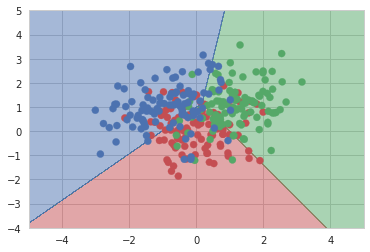

In [9]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), 
                     np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(lda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

QDA에서 실제 공분산이 같다고 설정한 클래스 2, 3 사이의 경계선 또한 LDA 모형처럼 직선이 되는 것을 확인할 수 있다.

# 연습1

1) QDA와 LDA를 사용하여 붓꽃 분류 문제를 풀고 성능을 confusion matrix와 classification report를 구하여 비교한다.

In [10]:
from sklearn.datasets import load_iris
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.rename( { 'sepal length (cm)':'Sepal_length', 
             'sepal width (cm)' :'Sepal_width', 
             'petal length (cm)':'Petal_length',
             'petal width (cm)' : 'Petal_width',
             },inplace=True, axis='columns')
X = df[['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width']]
y = df['species']
df.tail()

,Sepal_length,Sepal_width,Petal_length,Petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import *

qda = QuadraticDiscriminantAnalysis().fit(X, y)

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd").fit(X, y)

y_pred = qda.predict(X)
y_pred2 = lda.predict(X)

print("QDA confusion_matrix \n\n",confusion_matrix(y, y_pred),"\n\n")
print("LDA confusion_matrix \n\n",confusion_matrix(y, y_pred2),"\n\n")

target_names = ['setosa', 'versicolor','virginica']
print("QDA",classification_report(y, y_pred, target_names=target_names))
print("LDA",classification_report(y, y_pred2, target_names=target_names))

QDA confusion_matrix 

 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]] 


LDA confusion_matrix 

 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]] 


QDA              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.96      0.97        50
  virginica       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150

LDA              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.96      0.97        50
  virginica       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



2) 두 모형에 대해 (각 클래스에 대한 OvR 문제의) ROC 커브를 그린다.

In [12]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() # 객체 생성
y1 = lb.fit_transform(y)

In [13]:
from sklearn.multiclass import OneVsRestClassifier

model1 = OneVsRestClassifier(QuadraticDiscriminantAnalysis()).fit(X, y)
model2 = OneVsRestClassifier(LinearDiscriminantAnalysis(n_components=3, 
                                 solver="svd", store_covariance=True)).fit(X, y)

auc: 1.0
auc: 0.9988
auc: 0.9962


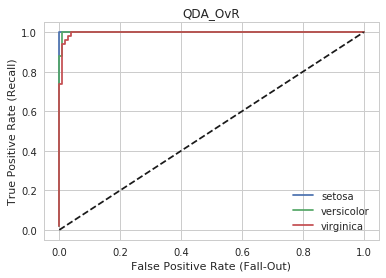

In [14]:
fpr1, tpr1, thresholds1 =roc_curve(y1[:,0], model1.decision_function(X)[:,0])
fpr2, tpr2, thresholds2 =roc_curve(y1[:,1], model1.decision_function(X)[:,1])
fpr3, tpr3, thresholds3 =roc_curve(y1[:,2], model1.decision_function(X)[:,2])

plt.plot(fpr1, tpr1, label="setosa")
plt.plot(fpr2, tpr2, label="versicolor")
plt.plot(fpr3, tpr3, label="virginica")

plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('QDA_OvR')
print ("auc:",auc(fpr1, tpr1))
print ("auc:",auc(fpr2, tpr2))
print ("auc:",auc(fpr3, tpr3))

plt.show()

auc: 1.0
auc: 0.8258000000000001
auc: 0.9785999999999999


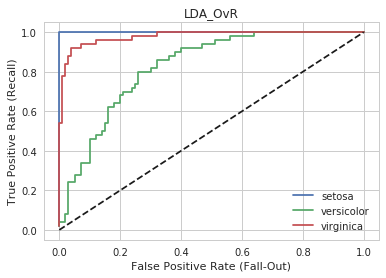

In [15]:
fpr1, tpr1, thresholds1 =roc_curve(y1[:,0], model2.decision_function(X)[:,0])
fpr2, tpr2, thresholds2 =roc_curve(y1[:,1], model2.decision_function(X)[:,1])
fpr3, tpr3, thresholds3 =roc_curve(y1[:,2], model2.decision_function(X)[:,2])

plt.plot(fpr1, tpr1, label="setosa")
plt.plot(fpr2, tpr2, label="versicolor")
plt.plot(fpr3, tpr3, label="virginica")

plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('LDA_OvR')
print ("auc:",auc(fpr1, tpr1))
print ("auc:",auc(fpr2, tpr2))
print ("auc:",auc(fpr3, tpr3))

plt.show()